In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import cv2
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import pickle

In [2]:
def read_all_images(file_names):
    result = []
    for i in file_names:
        image = plt.imread(os.getcwd() + '/' + i)
#         final_image = cv2.resize(image,(80,60))
        result.append(image)
    return result

In [3]:
os.chdir("/Users/parth/Downloads/golden")
images_golden = os.listdir()
golden_list = read_all_images(images_golden)
print(f"Length of Golden balloons {len(images_golden)} {len(golden_list)}")

os.chdir("/Users/parth/Downloads/red")
images_red = os.listdir()
red_list = read_all_images(images_red)
print(f"Length of Red balloons {len(images_red)} {len(red_list)}")

Length of Golden balloons 145 145
Length of Red balloons 150 150


In [4]:
golden_label = [0] * len(golden_list)
red_label = [1] * len(red_list)
Y = np.hstack([np.array(golden_label), np.array(red_label)])
Y.shape

(295,)

In [5]:
X = np.vstack([np.array(golden_list),np.array(red_list)])

In [6]:
X.shape

(295, 720, 1280, 3)

(720, 1280, 3)


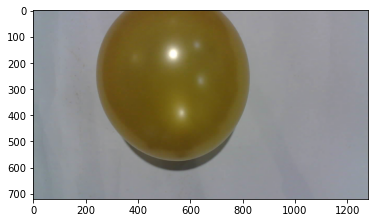

In [7]:
plt.imshow(X[0])
print(X[1].shape)

In [8]:
X_train, X_test, Y_train , Y_test = train_test_split(X,Y,test_size=0.1, random_state=42)
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

X_train = np.reshape(X_train,(X_train.shape[0], X_train.shape[1] * X_train.shape[2] * X_train.shape[3]))
X_test = np.reshape(X_test,(X_test.shape[0], X_test.shape[1] * X_test.shape[2] * X_test.shape[3]))
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(265, 720, 1280, 3) (265,)
(30, 720, 1280, 3) (30,)
(265, 2764800) (265,)
(30, 2764800) (30,)


In [9]:
classifier = RandomForestClassifier(n_estimators = 1000,max_depth=2, random_state=0)

In [10]:
classifier.fit(X_train,Y_train)

RandomForestClassifier(max_depth=2, n_estimators=1000, random_state=0)

In [11]:
y_pred = classifier.predict(X_test)

In [12]:
accuracy_score(Y_test,y_pred)

1.0

In [13]:
print(y_pred)

[1 1 0 0 1 0 0 1 1 0 1 1 0 1 1 0 0 1 1 0 0 1 1 0 0 0 1 1 1 1]


In [14]:
print(Y_test)

[1 1 0 0 1 0 0 1 1 0 1 1 0 1 1 0 0 1 1 0 0 1 1 0 0 0 1 1 1 1]


In [15]:
file = open("/Users/parth/Downloads/Projects/foray-perception /Random Forest/random_forest.pk",'wb')
model = pickle.dump(classifier,file)
file.close()

In [24]:
from micromlgen import port

In [25]:
c_code = port(classifier)
print(c_code)

#pragma once
#include <cstdarg>
namespace Eloquent {
    namespace ML {
        namespace Port {
            class RandomForest {
                public:
                    /**
                    * Predict class for features vector
                    */
                    int predict(float *x) {
                        uint8_t votes[2] = { 0 };
                        // tree #1
                        if (x[2119839] <= 139.5) {
                            votes[1] += 1;
                        }

                        else {
                            votes[0] += 1;
                        }

                        // tree #2
                        if (x[2701701] <= 145.5) {
                            if (x[1301356] <= 100.0) {
                                votes[0] += 1;
                            }

                            else {
                                votes[1] += 1;
                            }
                        }

                        else {
   

SANITY CHECK

In [59]:
import cv2

In [70]:
classifier_file = open("/Users/parth/Downloads/Projects/foray-perception /Random Forest/random_forest.pk",'rb')
classifier_rf = pickle.load(classifier_file)

image_arr = cv2.imread("/Users/parth/Downloads/Projects/foray-perception /Random Forest/test_0.jpg")
img_rgb = cv2.cvtColor(image_arr, cv2.COLOR_BGR2RGB)
print(img_rgb.shape)

(720, 1280, 3)


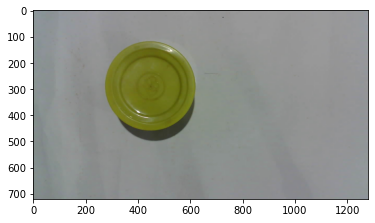

In [71]:
plt.imshow(img_rgb)

In [72]:
im_resize = np.reshape(image_arr,(1, image_arr.shape[0] * image_arr.shape[1] * image_arr.shape[2]))
print(im_resize.shape)

(1, 2764800)


In [73]:
classifier_rf.predict(im_resize)

array([0])